Codes and documents by [Hanieh Mahdavi](https://www.linkedin.com/in/hanieh-mahdavi/)

The goal is to train linear and non-linear models, using different ways, on a dataset related to BitCoin price, during a previous year.

* Linear Models
    * Direct Solution (Mathematic Equations)
    * Gradient Descent
        * Batch GD
        * Stochastic GD
* Ploynomial Models
    * Direct Solution (Mathematic Equations)
    * Gradient Descent
        * Batch GD
        * Stochastic GD

# Exploratory Data Analysis

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         data_path = os.path.join(dirname, filename)

# data = pd.read_csv(data_path)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# data_path = '/content/drive/MyDrive/Datasets/data.csv'
# data = pd.read_csv(data_path)

In [4]:
data = pd.read_csv('data.csv')

## Analyze Data

In [5]:
data.shape

(366, 2)

In [6]:
data.head()

,Date,Close
0,10/11/2020,11350
1,10/12/2020,11564
2,10/13/2020,11437
3,10/14/2020,11396
4,10/15/2020,11544


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   Close   366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


## Standardization
First, it subtracts the mean value, so standardized values always have a zero mean. Then, it divides by the standard deviation so that the resulting distribution has unit variance.

In [8]:
def standardization(data, mean, std):
    return (data - mean) / std

## Normalization

A scaler to map numbers to a range between 0 and 1.

In [9]:
def scaler(data, min_data):
    return (data - min_data) / 3.5

## Preprocess Data
* Type of **Date** column is object. It should be converted to **DateTime** type.
* A new column named **Timestamp** is inserted to the data set, in order to save the numeric values of datetimes.

In [10]:
def organize_data_set(data_set):
    
    # convert object type of date column to datetime
    data_set.Date = data_set.Date.apply(pd.to_datetime)
    
    # insert timestamp column to dataset
    # casting timestamp values to int64
    # since output is in nano second, it is divided by 10^9
    data_set.insert(1, 'Timestamp', data_set.Date.values.astype(np.int64) // 10 ** 9)
    
    return data_set.head()

In [11]:
organize_data_set(data)

,Date,Timestamp,Close
0,2020-10-11,1602374400,11350
1,2020-10-12,1602460800,11564
2,2020-10-13,1602547200,11437
3,2020-10-14,1602633600,11396
4,2020-10-15,1602720000,11544


In [12]:
timestamp_mean = np.mean(data.Timestamp)
timestamp_std = np.std(data.Timestamp)
data.Timestamp = standardization(data.Timestamp, timestamp_mean, timestamp_std)

In [13]:
timestamp_min = np.min(data.Timestamp)
data.Timestamp = scaler(data.Timestamp, timestamp_min)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Timestamp  366 non-null    float64       
 2   Close      366 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


## Visualize Data

In [15]:
def draw_graph(x, graphs, x_label, y_label, title, rotation=False):
    
    # draw multiple graphs in a plot
    for graph in graphs:
        plt.plot(x, graph['y'], graph['color'], label=graph['legend'])
            
    plt.title(title) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if(rotation):
        plt.xticks(rotation='vertical')
    
    plt.legend(loc ="upper left")
    
    plt.show()

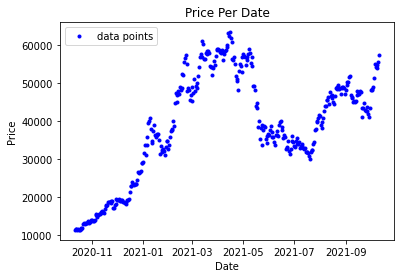

In [16]:
draw_graph(x=data.Date,
           graphs=[{'y':data.Close, 'color':'b.', 'legend': 'data points'}],
           x_label='Date',
           y_label='Price',
           title='Price Per Date')

## Split Test & Train Sets
The given data will be divided into two sets: **test set**, and **train set**.

In [17]:
def split_test_train(data, test_ratio):
    
    data_size = len(data)
    test_size = int(data_size * test_ratio)
    train_size = data_size - test_size

    # ----------------------------------------------------------------------------------------------------- #
    # to create random test and train sets, indices must be shuffled
    # ----------------------------------------------------------------------------------------------------- #
    
    # output is an array with random indeces between 0 to data_size - 1
    # set seed to prevent changing test data in every call of function
    shuffled_indices = np.random.RandomState(seed=26).permutation(data_size)
    
    # divide indeces for test and train set
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    
    test = data.iloc[test_indices]
    train = data.iloc[train_indices]
    
    # test = test.sort_index()
    # train = train.sort_index()
    
    # ----------------------------------------------------------------------------------------------------- #
    # since there are timestamps, to create a test set, we can have samples for test and train in order
    # ----------------------------------------------------------------------------------------------------- #

    # indices = np.array(range(0, data_size))

    # train_indices = indices[:train_size]
    # test_indices = indices[train_size:]
    
    # test = data.iloc[test_indices]
    # train = data.iloc[train_indices]
    
    return test, train

In [18]:
test, train = split_test_train(data, 0.25)

In [19]:
test_size = len(test)
train_size = len(train)

print('test size:', test_size)
print('train size:', train_size)

test size: 91
train size: 275


# Direct Solution

## Equations & Formulas

${y = w_{0} x_{0} + w_{1} x_{1}}$
<br>
${x_{0}={1},\;x_{1}={index}}$
<br>
<br>
${X_{m×2} =}$ ${[[x_{0}^{(1)}, x_{1}^{(1)}}], [x_{0}^{(2)}, x_{1}^{(2)}], ..., [x_{0}^{(m)}, x_{1}^{(m)}]]$
<br>
${W_{2×1} =}$ ${[[w_{0}], [w_{1}]]}$
<br>
${y_{m×1} =}$ ${[[y^{(1)}], [y^{(2)}],..., [y^{(m)}]]}$
<br>
<br>
${y = XW}$
<br>
${X^{T}y = (X^{T}X)W}$
<br>
${(X^{T}X)^{-1}X^{T}y = (X^{T}X)^{-1}(X^{T}X)W}$
<br>
${(X^{T}X)^{-1}X^{T}y = W}$
<br>
${W = (X^{T}X)^{-1}X^{T}y}$

## Train

### Create X Train
Join two vectors (bias=1 and index) by row, and the number of rows is equal:
<br>
${X =}$ ${[[{1}\;x^{(1)}],[{1}\;x^{(2)}], ..., [{1}\;x^{(m)}]]}$

In [20]:
def creat_X(data, degree=1):
    
    m = len(data)
    
    # there is only one feature to create X matrix based on that
    feature = data.Timestamp
    
    # first column of matrix X is 1
    X = np.ones((m, 1), dtype=float)
    
    # second column is x, third column is x^2, fourth column is x^3, ..., nth column is x^n
    for d in range(degree):
        X = np.c_[X, (feature)**(d + 1)]
            
    return X

In [21]:
X_train = creat_X(train)

### Create y Train

In [22]:
y_train = train.Close.to_numpy().reshape(train_size, 1)

### Calculate W
${W = (X^{T}X)^{-1}X^{T}y}$

In [23]:
def direct_solution(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [24]:
W_direct = direct_solution(X_train, y_train)
print(W_direct)

[[23965.3178975 ]
 [30099.47657723]]


## Prediction

${y = XW}$

### Create X Test

In [25]:
X_test = creat_X(test)

### Predict y Test

In [26]:
y_predict_direct = np.dot(X_test, W_direct)

## Analyze Answer

### Model Visualization

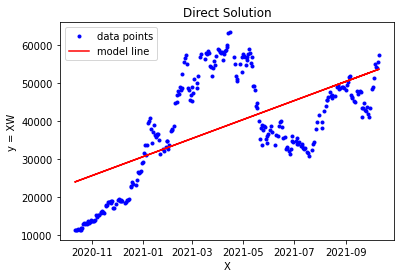

In [27]:
draw_graph(train.Date,
           graphs=[{'y':y_train, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train, W_direct), 'color':'r-', 'legend': 'model line'}],
           x_label='X',
           y_label='y = XW',
           title='Direct Solution')

### Test Result Visualization

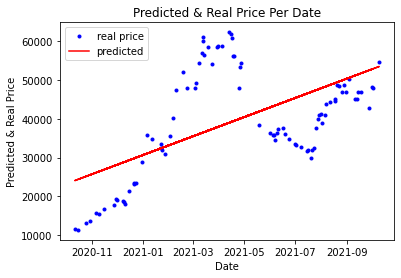

In [28]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_direct, 'color':'r-', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

### R-Squared Score
${R^{2} = }$ ${1 - \frac{RSS} {TSS}}$
<br>
${RSS = \sum_{i=1}^{m}{(y_{real}^{(i)} - y_{predicted}^{(i)})}^2}$
<br>
${TSS = \sum_{i=1}^{m}{(y_{real}^{(i)} - y_{mean})}^2}$

The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model.

In [29]:
def r_squared(y_real, y_predicted):
    
    rss = np.sum((y_real - y_predicted)**2)
    tss = np.sum((y_real - np.mean(y_real))**2)
                  
    return 100 * (1 - (rss / tss))

In [30]:
r2_score_direct = r_squared(test.Close, y_predict_direct.flatten())
print(r2_score_direct)

24.848754439576414


# Gradient Descent

## Batch Gradient Decsent
It uses the whole batch of training data at every step.

Initialize ${W}$ with a random number
<br>
In each iteration do:
<br>
${\;\;\;}$${Gradient=}$ $\frac{1}{m}$$X^{T}$${(XW-y)}$
<br>
${\;\;\;W=}$ ${W}$ - ${α Gradient}$

### Algorithm

In [31]:
def batch_gradient_descent(X, y, m, iterations, alpha):
    
    # number of columns of X
    n = X.shape[1]
    
    # weights are initialized with random numbers from the normal distribution
    W = np.random.normal(size=(n, 1))
    
    # save changes of weights
    save_W = np.zeros((iterations, n), dtype=float)
    
    for i in range(iterations):
        
        # use 1/2 coefficient to avoid getting NaN weights in high dimensions and many iteratins
        gradient = (1 / (2 * m)) * np.dot(X.T, (np.dot(X, W) - y))
        
        save_W[i] = W.reshape(1, n)
        W = W - alpha * gradient

    return W, save_W

### Cross Validation
Since the size of data set is too small and there are alpha and iteration hyperparameters, train set will be divided into small sets as **validation sets**, to detremine the best value of alpha and iteration. In each iteration, some instances will be considered as test and other instances as train. A model will be traind on train set and it will be tested on test sets. Average accuracy is reported for each model and degree.

In [32]:
def cross_validation(data_set, models, iterations, alphas, folds=3, degree=1):
    
    # number of instances in each fold
    fold_size = int(len(data_set) / folds)
    
    for model in models:
        for alpha in alphas:
            for iteration in iterations:
            
                W = np.zeros((degree, 1), dtype=float)
                sum_r2_score = 0

                for fold in range(folds):

                    # last fold has smaller instances than the other folds
                    if fold == folds - 1:
                        test_set = data_set[fold * fold_size : ]
                    else:
                        test_set = data_set[fold * fold_size : (fold + 1) * fold_size]

                    # instances that are in data_set, but not in test_set are considered as train_set
                    train_set = data_set[~data_set.isin(test_set)].dropna()

                    X_train = creat_X(train_set, degree=degree)
                    y_train = train_set.Close.to_numpy().reshape(len(train_set), 1)

                    X_test = creat_X(test_set, degree=degree)
                    y_test = test_set.Close

                    if model == 'batch_gd':
                        W, _ = batch_gradient_descent(X_train, y_train, len(train_set), alpha=alpha, iterations=iteration)
                    elif model == 'stochastic_gd':
                        W, _ = stochastic_gradient_descent(X_train, y_train, len(train_set), alpha=alpha, iterations=iteration)
                    else:
                        print("wrong model name: ", model)
                        return

                    y_predict = np.dot(X_test, W)

                    r2_score = r_squared(y_test, y_predict.flatten())
                    sum_r2_score = sum_r2_score + r2_score

                print("model:" , model, ", alpha:", alpha, ", iterations:", iteration, ", r2_score:", sum_r2_score / folds)
        print("\n")      

In [33]:
cross_validation(data_set=train,
                 models=['batch_gd'],
                 iterations=[300, 400, 500],
                 alphas=[0.15, 0.25, 0.35],
                 folds=3)

model: batch_gd , alpha: 0.15 , iterations: 300 , r2_score: 34.78281572928639
model: batch_gd , alpha: 0.15 , iterations: 400 , r2_score: 34.98319697744402
model: batch_gd , alpha: 0.15 , iterations: 500 , r2_score: 35.04990289478305
model: batch_gd , alpha: 0.25 , iterations: 300 , r2_score: 35.0501120275571
model: batch_gd , alpha: 0.25 , iterations: 400 , r2_score: 35.07755122172554
model: batch_gd , alpha: 0.25 , iterations: 500 , r2_score: 35.082795818857335
model: batch_gd , alpha: 0.35 , iterations: 300 , r2_score: 35.079246098803594
model: batch_gd , alpha: 0.35 , iterations: 400 , r2_score: 35.08417214380958
model: batch_gd , alpha: 0.35 , iterations: 500 , r2_score: 35.08622080303493




It appears that the model is too simple, and there is no noticeable difference in the number of iterations and the value of alpha.

In [34]:
W_batch_gd, save_W_batch_gd = batch_gradient_descent(X_train, y_train, train_size, iterations=300, alpha=0.25)
print(W_batch_gd)

[[24569.24567645]
 [28929.79706919]]


### Prediction

In [35]:
y_predict_batch_gd = np.dot(X_test, W_batch_gd)

### Analyze Answer

#### Gradient Visualization

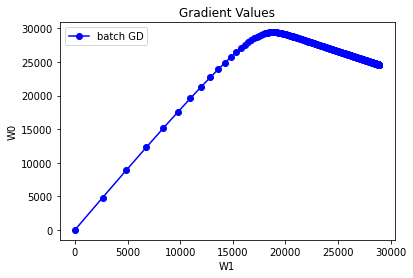

In [36]:
draw_graph(x=save_W_batch_gd[:, 1],
           graphs=[{'y':save_W_batch_gd[:, 0], 'color':'b-o', 'legend': 'batch GD'}],
           x_label='W1',
           y_label='W0',
           title='Gradient Values')

#### Model Visualization

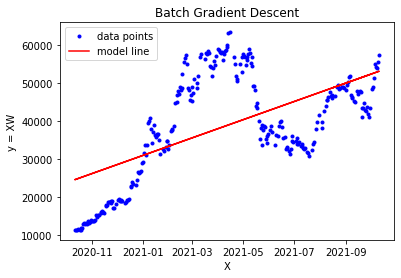

In [37]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train, W_batch_gd), 'color':'r-', 'legend': 'model line'}],
           x_label='X',
           y_label='y = XW',
           title='Batch Gradient Descent')

#### Test Result Visualization

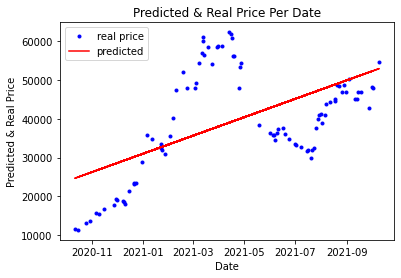

In [38]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_batch_gd, 'color':'r-', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

#### R-Squared Score

In [39]:
r2_score_batch_gd = r_squared(test.Close, y_predict_batch_gd.flatten())
print(r2_score_batch_gd)

25.31371126063021


## Stochastic Gradient Descent
Instead of using the whole batch at every step, it uses a random instance and computes gradient, based on that single instance. It is much faster than batch gradient descent in larg datasets but less regular. In addition, since it is based on randomness,  chance of finding the global minimum is more probable. But, it does not find the exact value of the global minimum. Also, the value of α is changed dynamically. In the first steps, it is larger, but in the last steps it is smaller.

Initialize ${W}$ with a random number
<br>
In each iteration do:
<br>
${\;\;\;}$${index}$ = ${a\;random\;index\;between\;0\;to\;m}$
<br>
${\;\;\;}$${Gradient}$ = $x^{(index)T}$${(x^{(index)}W-y^{(index)})}$
<br>
${\;\;\;W}$ = ${W}$ - ${α Gradient}$

### Algorithm

In [40]:
def calculate_alpha(time, alpha):
    
    # reduce alpha by increasing time
    return alpha / time

In [41]:
def stochastic_gradient_descent(X, y, m, iterations, alpha, time=0):
    
    # number of columns of X
    n = X.shape[1]
    
    W = np.random.normal(size=(n, 1))
    save_W = np.zeros((iterations, n), dtype=float)
    
    for i in range(iterations):
        
        # pick a random instance
        index = np.random.randint(m)
        
        x_index = X[index : index + 1]
        y_index = y[index : index + 1]
        
        # change time and alpha very slowly
        time = (time * (i / (iterations * 10))) + 1
        alpha = calculate_alpha(time, alpha)
        
        # use 1/2 coefficient to avoid getting NaN weights in high dimensions and many iteratins
        gradient = (1 / 2) * np.dot(x_index.T, (np.dot(x_index, W) - y_index))
        
        save_W[i] = W.reshape(1, n)
        W = W - alpha * gradient
                
    return W, save_W

### Cross Validation

In [42]:
cross_validation(data_set=train,
                 models=['stochastic_gd'],
                 iterations=[300, 400, 500, 600],
                 alphas=[0.15, 0.35, 0.55],
                 folds=3)

model: stochastic_gd , alpha: 0.15 , iterations: 300 , r2_score: 29.64006410465858
model: stochastic_gd , alpha: 0.15 , iterations: 400 , r2_score: 29.60263256857048
model: stochastic_gd , alpha: 0.15 , iterations: 500 , r2_score: 31.821540374199156
model: stochastic_gd , alpha: 0.15 , iterations: 600 , r2_score: 31.555384462327037
model: stochastic_gd , alpha: 0.35 , iterations: 300 , r2_score: 33.673913366038
model: stochastic_gd , alpha: 0.35 , iterations: 400 , r2_score: 32.10490893747993
model: stochastic_gd , alpha: 0.35 , iterations: 500 , r2_score: 33.644531420123194
model: stochastic_gd , alpha: 0.35 , iterations: 600 , r2_score: 33.30393401512023
model: stochastic_gd , alpha: 0.55 , iterations: 300 , r2_score: 33.64396923292169
model: stochastic_gd , alpha: 0.55 , iterations: 400 , r2_score: 34.33861754609712
model: stochastic_gd , alpha: 0.55 , iterations: 500 , r2_score: 32.901062772210715
model: stochastic_gd , alpha: 0.55 , iterations: 600 , r2_score: 33.46563354432854




It appears that the model is too simple, and there is no noticeable difference in the number of iterations and the value of alpha.

In [43]:
W_stochastic_gd, save_W_stochastic_gd = stochastic_gradient_descent(X_train, y_train, train_size, iterations=500, alpha=0.35)
print(W_stochastic_gd)

[[24144.93553306]
 [28369.08281623]]


### Prediction

In [44]:
y_predict_stochastic_gd = np.dot(X_test, W_stochastic_gd)

### Analyze Answer

#### Gradient Visualization

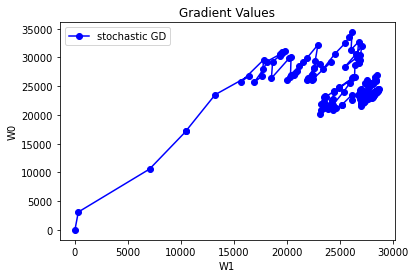

In [45]:
draw_graph(x=save_W_stochastic_gd[:, 1],
           graphs=[{'y':save_W_stochastic_gd[:, 0], 'color':'b-o', 'legend': 'stochastic GD'}],
           x_label='W1',
           y_label='W0',
           title='Gradient Values')

#### Model Visualization

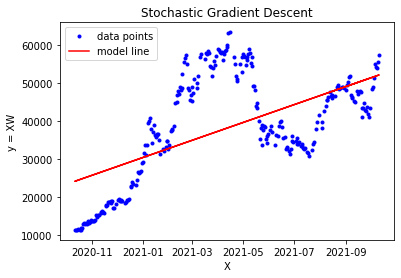

In [46]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train, W_stochastic_gd), 'color':'r-', 'legend': 'model line'}],
           x_label='X',
           y_label='y = XW',
           title='Stochastic Gradient Descent')

#### Test Result Visualization

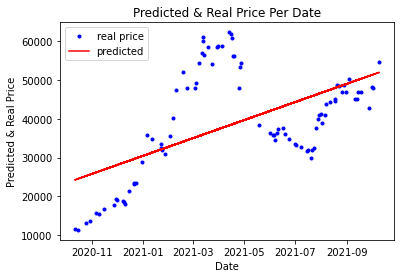

In [47]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_stochastic_gd, 'color':'r-', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

#### R-Squared Score

In [48]:
r2_score_stochastic_gd = r_squared(test.Close, y_predict_stochastic_gd.flatten())
print(r2_score_stochastic_gd)

25.543212916723167


## Compare Direct Solution & Gradient Descent

### Models

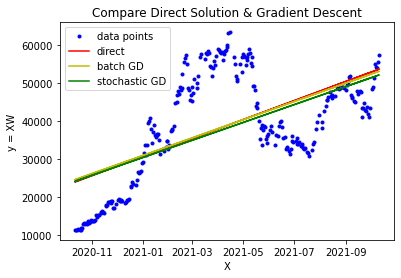

In [49]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train, W_direct), 'color':'r-', 'legend': 'direct'},
                   {'y':np.dot(X_train, W_batch_gd), 'color':'y-', 'legend': 'batch GD'},
                   {'y':np.dot(X_train, W_stochastic_gd), 'color':'g-', 'legend': 'stochastic GD'}],
           x_label='X',
           y_label='y = XW',
           title='Compare Direct Solution & Gradient Descent')

### Test Results

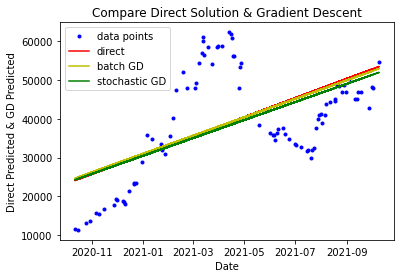

In [50]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'data points'},
                   {'y':y_predict_direct, 'color':'r-', 'legend': 'direct'},
                   {'y':y_predict_batch_gd, 'color':'y-', 'legend': 'batch GD'},
                   {'y':y_predict_stochastic_gd, 'color':'g-', 'legend': 'stochastic GD'}],
           x_label='Date',
           y_label='Direct Predicted & GD Predicted',
           title='Compare Direct Solution & Gradient Descent')

# Polynomial Regression

## Cross Validation
Since the size of data set is too small and there is degree hyperparameter, train set will be divided into small sets as **validation sets**, to detremine the best polynomial model and degree. In each iteration, some instances will be considered as test and other instances as train. A model will be traind on train set and it will be tested on test sets. Average accuracy is reported for each model and degree.

In [51]:
def poly_cross_validation(data_set, max_degree, models, folds=3):
    
    # number of instances in each fold
    fold_size = int(len(data_set) / folds)
    
    for model in models:
        for degree in range(1, max_degree + 1):
            
            W = np.zeros((degree, 1), dtype=float)
            sum_r2_score = 0
            
            for fold in range(folds):
                
                # last fold has smaller instances than the other folds
                if fold == folds - 1:
                    test_set = data_set[fold * fold_size : ]
                else:
                    test_set = data_set[fold * fold_size : (fold + 1) * fold_size]
                
                # instances that are in data_set, but not in test_set are considered as train_set
                train_set = data_set[~data_set.isin(test_set)].dropna()
                
                X_train = creat_X(train_set, degree=degree)
                y_train = train_set.Close.to_numpy().reshape(len(train_set), 1)
                
                X_test = creat_X(test_set, degree=degree)
                y_test = test_set.Close.to_numpy().reshape(len(test_set), 1)
                
                if model == 'direct':
                    W = direct_solution(X_train, y_train)
                elif model == 'batch_gd':
                    W, _ = batch_gradient_descent(X_train, y_train, len(train_set), alpha=0.5, iterations=25000)
                elif model == 'stochastic_gd':
                    W, _ = stochastic_gradient_descent(X_train, y_train, len(train_set), alpha=0.75, iterations=25000)
                else:
                    print("wrong model name: ", model)
                    return 
                
                y_predict = np.dot(X_test, W)
        
                r2_score = r_squared(y_test, y_predict)
                sum_r2_score = sum_r2_score + r2_score
                
            print("model:" , model, ", degree:", degree, ", r2_score:", sum_r2_score / folds)
        print("\n")      

In [52]:
poly_cross_validation(data_set=train,
                      max_degree=10,
                      models=['direct', 'batch_gd', 'stochastic_gd'],
                      folds=3)

model: direct , degree: 1 , r2_score: 35.08821606454716
model: direct , degree: 2 , r2_score: 60.59362533906735
model: direct , degree: 3 , r2_score: 70.49865130059366
model: direct , degree: 4 , r2_score: 81.65966768610748
model: direct , degree: 5 , r2_score: 85.61707289563844
model: direct , degree: 6 , r2_score: 89.83394837271612
model: direct , degree: 7 , r2_score: 89.9869503487788
model: direct , degree: 8 , r2_score: 93.23966048071429
model: direct , degree: 9 , r2_score: 94.25266077505557
model: direct , degree: 10 , r2_score: 94.23617709646334


model: batch_gd , degree: 1 , r2_score: 35.08821606454715
model: batch_gd , degree: 2 , r2_score: 60.59362552341693
model: batch_gd , degree: 3 , r2_score: 65.88549373611453
model: batch_gd , degree: 4 , r2_score: 73.88861749484253
model: batch_gd , degree: 5 , r2_score: 76.89406708565991
model: batch_gd , degree: 6 , r2_score: 77.62254090803707
model: batch_gd , degree: 7 , r2_score: 77.27549911440519
model: batch_gd , degree: 8 , r2

It appears that degree=8 for direct solution, degree=6 for batch gradient descent, and degree=9 for stochastic gradient descent,  could be the best degree.

In [53]:
direct_degree = 8
batch_gd_degree = 6
stochastic_gd_degree = 9

## Train

In [54]:
X_train_poly_direct = creat_X(train, degree=direct_degree)
X_train_poly_batch_gd = creat_X(train, degree=batch_gd_degree)
X_train_poly_stochastic_gd = creat_X(train, degree=stochastic_gd_degree)

In [55]:
y_train_poly = train.Close.to_numpy().reshape(train_size, 1)

## Test

In [56]:
X_test_poly_direct = creat_X(test, degree=direct_degree)
X_test_poly_batch_gd = creat_X(test, degree=batch_gd_degree)
X_test_poly_stochastic_gd = creat_X(test, degree=stochastic_gd_degree)

## Direct Solution

### Formulas

${y = w_{0} x_{0} + w_{1} x_{1} + w_{2} x_{2} + {...} + w_{n} x_{n}}$
<br>
${x_{0}={1},\;x_{1}={index}, \;x_{2}=x_{1}^{2}, \;..., \;x_{n}=x_{1}^{n}}$
<br>
<br>
${X_{m×n} = }$ ${[[x_{0}^{(1)}, x_{1}^{(1)}, x_{2}^{(1)}, \;{...},\; x_{n}^{(1)}], [x_{0}^{(2)}, x_{1}^{(2)}, x_{2}^{(2)}, \;{...}, \;x_{n}^{(2)}], \;{...},\; [x_{0}^{(m)}, x_{1}^{(m)}, x_{2}^{(m)}, {...}, x_{n}^{(m)}]]}$
<br>
${W_{n×1} =}$ ${[[w_{0}], [w_{1}], [w_{2}], ..., [w_{n}]]}$
<br>
${y_{m×1} =}$ ${[[y^{(1)}], [y^{(2)}],..., [y^{(m)}]]}$
<br>
<br>
${y = XW}$
<br>
${X^{T}y = (X^{T}X)W}$
<br>
${(X^{T}X)^{-1}X^{T}y = (X^{T}X)^{-1}(X^{T}X)W}$
<br>
${(X^{T}X)^{-1}X^{T}y = W}$
<br>
${W = (X^{T}X)^{-1}X^{T}y}$

#### Calculate W
${W = (X^{T}X)^{-1}X^{T}y}$

In [57]:
W_poly_direct = direct_solution(X_train_poly_direct, y_train_poly)
print(W_poly_direct)

[[ 1.53851731e+04]
 [-3.15575293e+05]
 [ 7.40569970e+06]
 [-6.19091760e+07]
 [ 2.67769813e+08]
 [-6.26394135e+08]
 [ 7.96705416e+08]
 [-5.18434651e+08]
 [ 1.35221581e+08]]


### Prediction
${y = XW}$

#### Predict y Test

In [58]:
y_predict_poly_direct = np.dot(X_test_poly_direct, W_poly_direct)

### Analyze Answer

#### Model Visualization

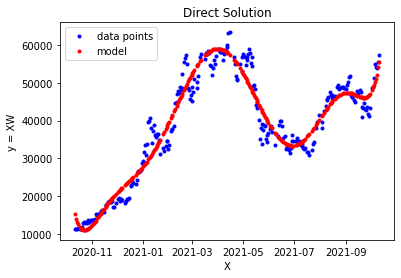

In [59]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train_poly, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train_poly_direct, W_poly_direct), 'color':'r.', 'legend': 'model'}],
           x_label='X',
           y_label='y = XW',
           title='Direct Solution')

#### Test Result Visualization

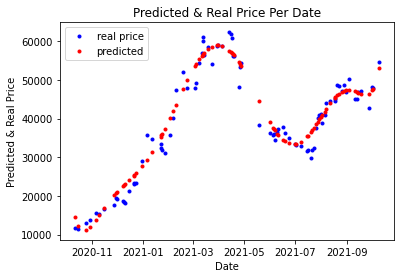

In [60]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_poly_direct, 'color':'r.', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

#### R-Squared Score

In [61]:
r2_score_poly_direct = r_squared(test.Close, y_predict_poly_direct.flatten())
print(r2_score_poly_direct)

95.39397898645352


## Gradient Descent

### Batch Gradient Descent

#### Cross Validation

In [62]:
cross_validation(data_set=train,
                 models=['batch_gd'],
                 iterations=[10000, 20000, 30000],
                 alphas=[0.25, 0.35, 0.45],
                 degree=6,
                 folds=3)

model: batch_gd , alpha: 0.25 , iterations: 10000 , r2_score: 74.21911538306516
model: batch_gd , alpha: 0.25 , iterations: 20000 , r2_score: 77.28958756040129
model: batch_gd , alpha: 0.25 , iterations: 30000 , r2_score: 77.55072663728888
model: batch_gd , alpha: 0.35 , iterations: 10000 , r2_score: 76.30992641371087
model: batch_gd , alpha: 0.35 , iterations: 20000 , r2_score: 77.53497907930229
model: batch_gd , alpha: 0.35 , iterations: 30000 , r2_score: 77.59425733961815
model: batch_gd , alpha: 0.45 , iterations: 10000 , r2_score: 77.1052016312414
model: batch_gd , alpha: 0.45 , iterations: 20000 , r2_score: 77.57575674009577
model: batch_gd , alpha: 0.45 , iterations: 30000 , r2_score: 77.63819077523353




#### Algorithm

In [63]:
W_poly_batch_gd, save_W_poly_batch_gd = batch_gradient_descent(X_train_poly_batch_gd, y_train_poly, train_size, iterations=30000, alpha=0.35)
print(W_poly_batch_gd)

[[   2181.6133568 ]
 [ 170299.54215556]
 [ -79192.31904115]
 [-138974.85013806]
 [ -63704.67574993]
 [  41927.08292129]
 [ 130149.81226574]]


#### Prediction

In [64]:
y_predict_poly_batch_gd = np.dot(X_test_poly_batch_gd, W_poly_batch_gd)

#### Analyze Answer

##### Gradient Visualization

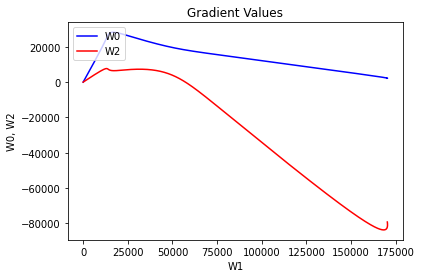

In [65]:
draw_graph(x=save_W_poly_batch_gd[:, 1],
           graphs=[{'y':save_W_poly_batch_gd[:, 0], 'color':'b-', 'legend': 'W0'},
                   {'y':save_W_poly_batch_gd[:, 2], 'color':'r-', 'legend': 'W2'}],
           x_label='W1',
           y_label='W0, W2',
           title='Gradient Values')

##### Model Visualization

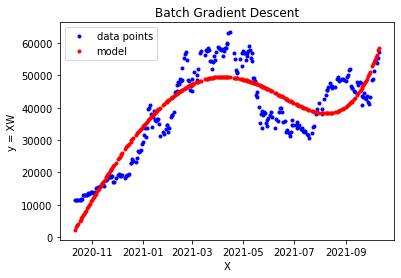

In [66]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train_poly, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train_poly_batch_gd, W_poly_batch_gd), 'color':'r.', 'legend': 'model'}],
           x_label='X',
           y_label='y = XW',
           title='Batch Gradient Descent')

##### Test Result Visualization

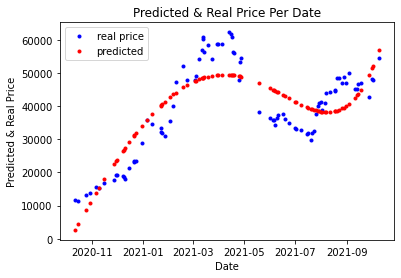

In [67]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_poly_batch_gd, 'color':'r.', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

#### R-Squared Score

In [68]:
r2_score_poly_batch_gd = r_squared(test.Close, y_predict_poly_batch_gd.flatten())
print(r2_score_poly_batch_gd)

73.29947822621345


### Stochastic Gradient Descent

#### Cross Validation

In [69]:
cross_validation(data_set=train,
                 models=['stochastic_gd'],
                 iterations=[15000, 25000, 35000],
                 alphas=[0.35, 0.55, 0.75, 0.85],
                 degree=9,
                 folds=3)

model: stochastic_gd , alpha: 0.35 , iterations: 15000 , r2_score: 47.40216155447424
model: stochastic_gd , alpha: 0.35 , iterations: 25000 , r2_score: 49.97072237407205
model: stochastic_gd , alpha: 0.35 , iterations: 35000 , r2_score: 52.17858023214891
model: stochastic_gd , alpha: 0.55 , iterations: 15000 , r2_score: 52.39575191380296
model: stochastic_gd , alpha: 0.55 , iterations: 25000 , r2_score: 55.45931235379635
model: stochastic_gd , alpha: 0.55 , iterations: 35000 , r2_score: 59.33855324646268
model: stochastic_gd , alpha: 0.75 , iterations: 15000 , r2_score: 56.434614972434325
model: stochastic_gd , alpha: 0.75 , iterations: 25000 , r2_score: 61.47120725860959
model: stochastic_gd , alpha: 0.75 , iterations: 35000 , r2_score: 63.385010192894015
model: stochastic_gd , alpha: 0.85 , iterations: 15000 , r2_score: 58.990050413796375
model: stochastic_gd , alpha: 0.85 , iterations: 25000 , r2_score: 62.886571699660294
model: stochastic_gd , alpha: 0.85 , iterations: 35000 , r2_s

#### Algorithm

In [70]:
W_poly_stochastic_gd, save_W_poly_stochastic_gd = stochastic_gradient_descent(X_train_poly_stochastic_gd, y_train_poly, train_size, iterations=35000, alpha=0.75)
print(W_poly_stochastic_gd)

[[ 15348.82911282]
 [ 75871.51055395]
 [ -8340.11385716]
 [-32744.7339268 ]
 [-28809.11488517]
 [-16147.24237098]
 [ -2771.07720726]
 [  8614.53580122]
 [ 17452.67417971]
 [ 23944.1204366 ]]


#### Prediction

In [71]:
y_predict_poly_stochastic_gd = np.dot(X_test_poly_stochastic_gd, W_poly_stochastic_gd)

#### Analyze Answer

##### Gradient Visualization

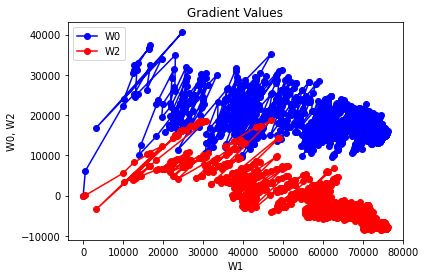

In [72]:
draw_graph(x=save_W_poly_stochastic_gd[:, 1],
           graphs=[{'y':save_W_poly_stochastic_gd[:, 0], 'color':'b-o', 'legend': 'W0'},
                   {'y':save_W_poly_stochastic_gd[:, 2], 'color':'r-o', 'legend': 'W2'}],
           x_label='W1',
           y_label='W0, W2',
           title='Gradient Values')

##### Model Visualization

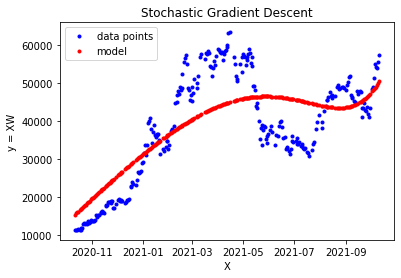

In [73]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train_poly, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train_poly_stochastic_gd, W_poly_stochastic_gd), 'color':'r.', 'legend': 'model'}],
           x_label='X',
           y_label='y = XW',
           title='Stochastic Gradient Descent')

##### Test Result Visualization

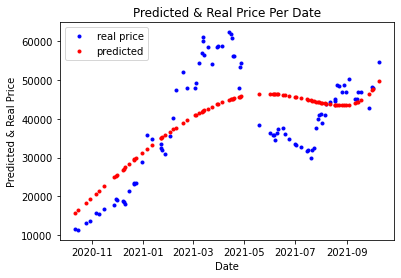

In [74]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'real price'},
                   {'y':y_predict_poly_stochastic_gd, 'color':'r.', 'legend': 'predicted'}],
           x_label='Date',
           y_label='Predicted & Real Price',
           title='Predicted & Real Price Per Date')

#### R-Squared Score

In [75]:
r2_score_poly_stochastic_gd = r_squared(test.Close, y_predict_poly_stochastic_gd.flatten())
print(r2_score_poly_stochastic_gd)

55.71223623551125


## Compare Direct Solution & Gradient Descent

### Models

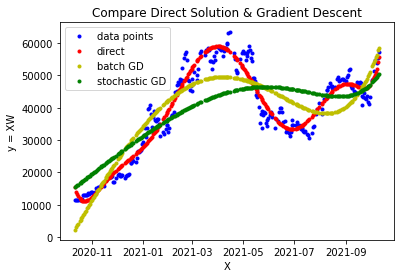

In [76]:
draw_graph(x=train.Date,
           graphs=[{'y':y_train_poly, 'color':'b.', 'legend': 'data points'},
                   {'y':np.dot(X_train_poly_direct, W_poly_direct), 'color':'r.', 'legend': 'direct'},
                   {'y':np.dot(X_train_poly_batch_gd, W_poly_batch_gd), 'color':'y.', 'legend': 'batch GD'},
                   {'y':np.dot(X_train_poly_stochastic_gd, W_poly_stochastic_gd), 'color':'g.', 'legend': 'stochastic GD'}],
           x_label='X',
           y_label='y = XW',
           title='Compare Direct Solution & Gradient Descent')

### Test Results

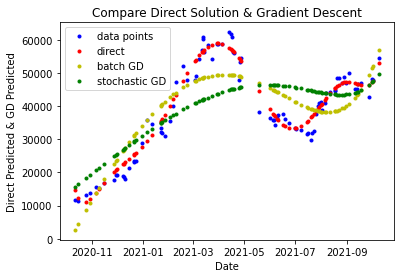

In [77]:
draw_graph(x=test.Date,
           graphs=[{'y':test.Close, 'color':'b.', 'legend': 'data points'},
                   {'y':y_predict_poly_direct, 'color':'r.', 'legend': 'direct'},
                   {'y':y_predict_poly_batch_gd, 'color':'y.', 'legend': 'batch GD'},
                   {'y':y_predict_poly_stochastic_gd, 'color':'g.', 'legend': 'stochastic GD'}],
           x_label='Date',
           y_label='Direct Predicted & GD Predicted',
           title='Compare Direct Solution & Gradient Descent')

## Polynomial Model to Predict Bitcoin Price for 10 Future Days (10/12/2021 to 10/21/2021)

In [78]:
data.tail()

,Date,Timestamp,Close
361,2021-10-07,0.976226,54205
362,2021-10-08,0.978930,53951
363,2021-10-09,0.981634,54651
364,2021-10-10,0.984339,55425
365,2021-10-11,0.987043,57390


In [79]:
years = [2021] * 10
months = [10] * 10
days = [day for day in range(12, 22)]

In [80]:
series = pd.to_datetime(pd.DataFrame({'year': years,
                                      'month': months,
                                      'day': days})).rename("Date")

In [81]:
df = series.to_frame()

In [82]:
organize_data_set(df)

,Date,Timestamp
0,2021-10-12,1633996800
1,2021-10-13,1634083200
2,2021-10-14,1634169600
3,2021-10-15,1634256000
4,2021-10-16,1634342400


In [83]:
df.Timestamp = standardization(df.Timestamp, timestamp_mean, timestamp_std)

In [84]:
df.Timestamp = scaler(df.Timestamp, timestamp_min)

In [85]:
X_test_poly_predict_direct = creat_X(df, degree=direct_degree)
X_test_poly_predict_batch_gd = creat_X(df, degree=batch_gd_degree)
X_test_poly_predict_stochastic_gd = creat_X(df, degree=stochastic_gd_degree)

In [86]:
df.head()

,Date,Timestamp
0,2021-10-12,0.989747
1,2021-10-13,0.992451
2,2021-10-14,0.995155
3,2021-10-15,0.997860
4,2021-10-16,1.000564


In [87]:
y_predict_poly_direct_predict = np.dot(X_test_poly_predict_direct, W_poly_direct)
y_predict_poly_batch_gd_predict = np.dot(X_test_poly_predict_batch_gd, W_poly_batch_gd)
y_predict_poly_stochastic_gd_predict = np.dot(X_test_poly_predict_stochastic_gd, W_poly_stochastic_gd)

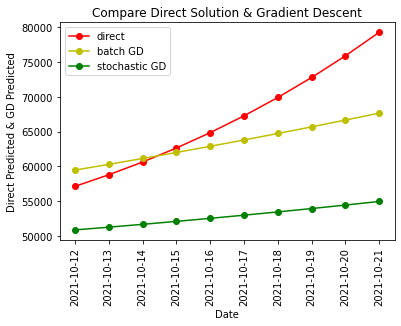

In [88]:
draw_graph(x=df.Date,
           graphs=[{'y':y_predict_poly_direct_predict, 'color':'r-o', 'legend': 'direct'},
                   {'y':y_predict_poly_batch_gd_predict, 'color':'y-o', 'legend': 'batch GD'},
                   {'y':y_predict_poly_stochastic_gd_predict, 'color':'g-o', 'legend': 'stochastic GD'}],
           x_label='Date',
           y_label='Direct Predicted & GD Predicted',
           title='Compare Direct Solution & Gradient Descent',
           rotation=True)